## Extracción y Analisis de los Datos


In [4]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#IMPORTAR CONJUNTO DE LIBRERÍAS
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [7]:
df = pd.read_csv('salaries.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [10]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [11]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [12]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [13]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Grafica de ubicaciones


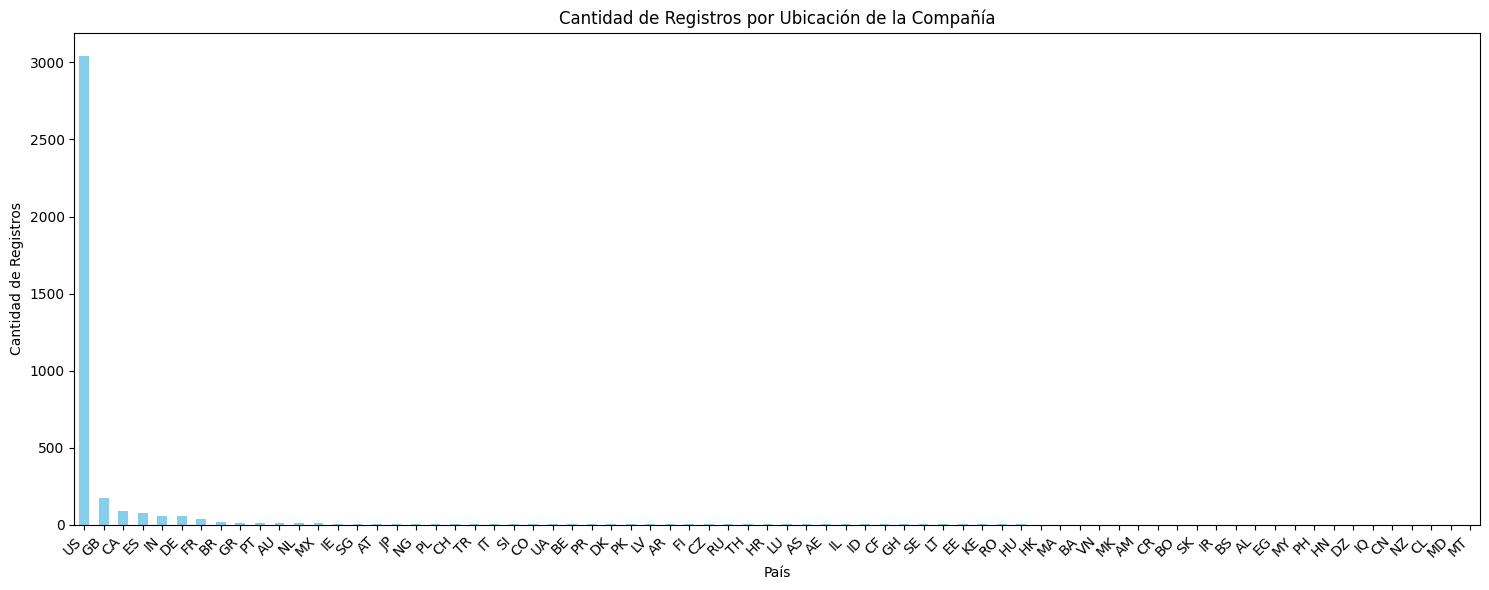

In [14]:
country_counts = df['company_location'].value_counts()


plt.figure(figsize=(15,6)) 
country_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Registros por Ubicación de la Compañía')
plt.xlabel('País')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

### Grafica de tipos de contratos


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/1267507173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df, x = 'employment_type', kind = 'count', palette = "tab10")


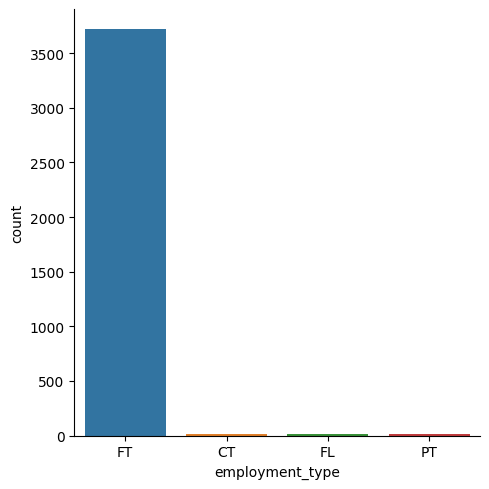

In [15]:
sb.catplot(data = df, x = 'employment_type', kind = 'count', palette = "tab10")  
plt.show()

### Cantidad de ofertas por año


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/1274460414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df, x = 'work_year', kind='count',palette = "tab10")


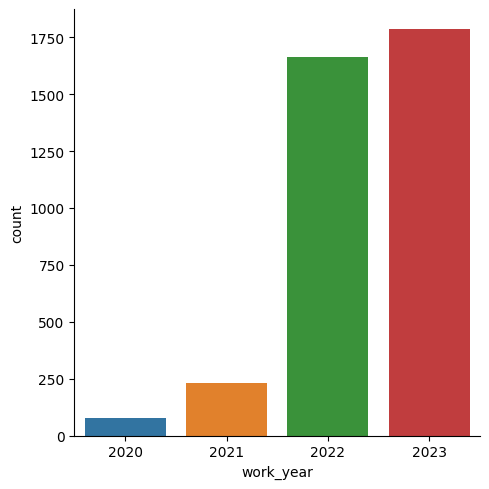

In [16]:
sb.catplot(data = df, x = 'work_year', kind='count',palette = "tab10")
plt.show()

### Filtros


De acuerdo a las gráficas realizadas en la sección anterior, decidimos filtrar el dataset para incluir unicamente los registros de empleo tiempo completo (FT) y aquellos que pertenezcan a los 5 paises con más registros. Además, se utilizan unicamente los annos 2022 y 2023 ya que incluyen la mayor cantidad de registros


In [17]:
# Filtrar los registros que pertenzcan a tiempo completo, a los paises con mas registros y en los años seleccionados
employment_type = 'FT' 
work_years = [2022, 2023]
company_locations = country_counts.head(5).index
mascara1 = (df['employment_type'] == employment_type) & (df['company_location'].isin(company_locations) & (df['work_year'].isin(work_years)))
df_proc_filtrado = df[mascara1]
# Guardar un DF para ser exportado 
df_final = df[mascara1]
df_proc_filtrado

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3472,2022,MI,FT,Data Scientist,48000,USD,48000,RU,100,US,S
3482,2022,SE,FT,Research Scientist,144000,USD,144000,US,50,US,L
3486,2022,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L
3490,2022,EN,FT,Data Engineer,120000,USD,120000,US,100,US,M


In [18]:
df_proc_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3225 entries, 0 to 3493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3225 non-null   int64 
 1   experience_level    3225 non-null   object
 2   employment_type     3225 non-null   object
 3   job_title           3225 non-null   object
 4   salary              3225 non-null   int64 
 5   salary_currency     3225 non-null   object
 6   salary_in_usd       3225 non-null   int64 
 7   employee_residence  3225 non-null   object
 8   remote_ratio        3225 non-null   int64 
 9   company_location    3225 non-null   object
 10  company_size        3225 non-null   object
dtypes: int64(4), object(7)
memory usage: 302.3+ KB


In [19]:
df_proc_filtrado.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3225.000000,3225,3225,3225,3.225000e+03,3225,3225.000000,3225,3225.000000,3225,3225
unique,NaN,4,1,75,NaN,5,NaN,17,NaN,5,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2353,3225,957,NaN,2976,NaN,2883,NaN,2899,2967
mean,2022.529922,NaN,NaN,NaN,1.634028e+05,NaN,146256.059845,NaN,42.899225,NaN,NaN
std,0.499181,NaN,NaN,NaN,2.438626e+05,NaN,58234.676636,NaN,49.115604,NaN,NaN
min,2022.000000,NaN,NaN,NaN,2.000000e+04,NaN,5723.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.068000e+05,NaN,106500.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.415250e+05,NaN,141290.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.836000e+05,NaN,181940.000000,NaN,100.000000,NaN,NaN


### Correlación entre variables


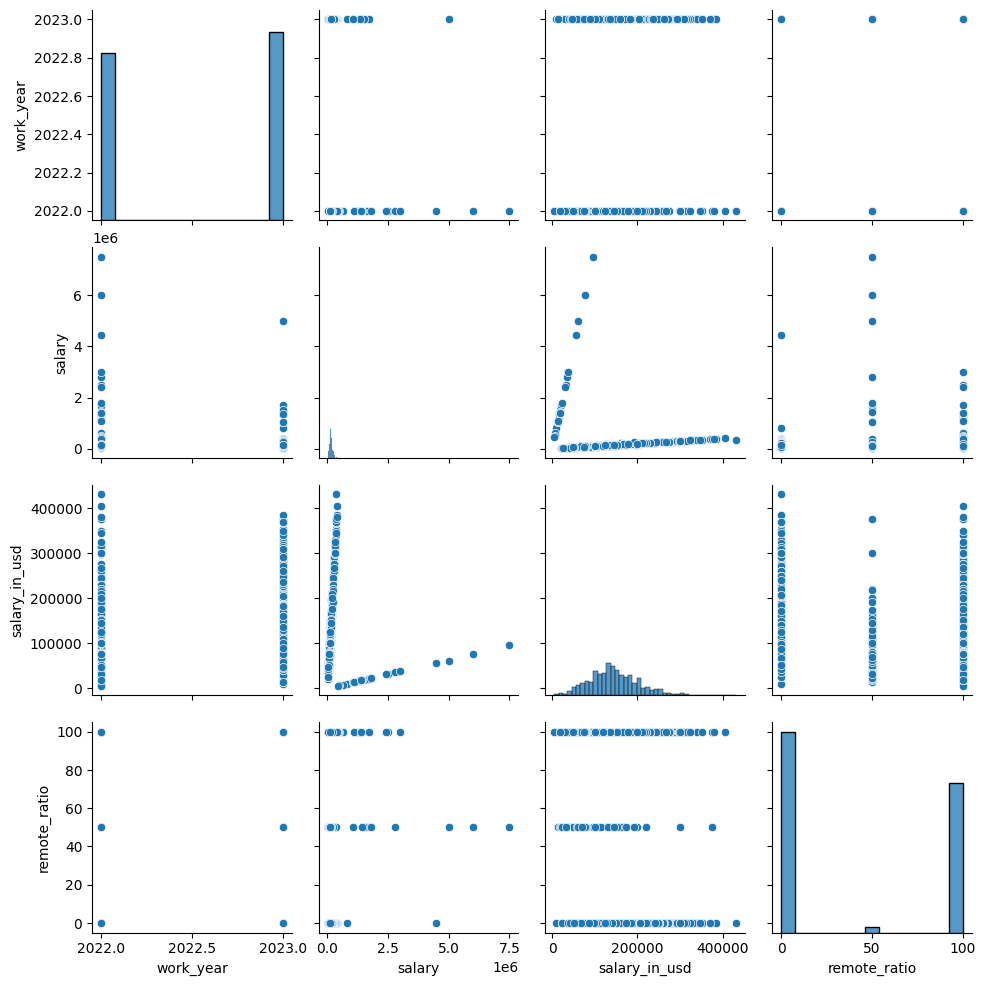

In [20]:
sb.pairplot(df_proc_filtrado)
plt.show()

### Distribución del Nivel de Experiencia


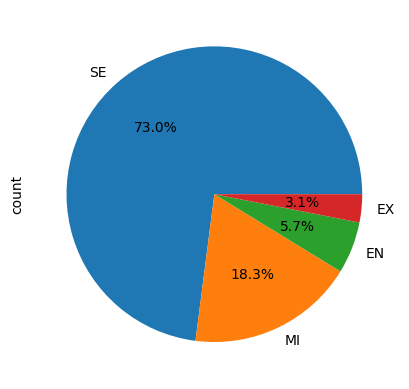

In [21]:
df_proc_filtrado['experience_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Salario en dolares por nivel de experiencia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/2941909499.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10", kind='box')


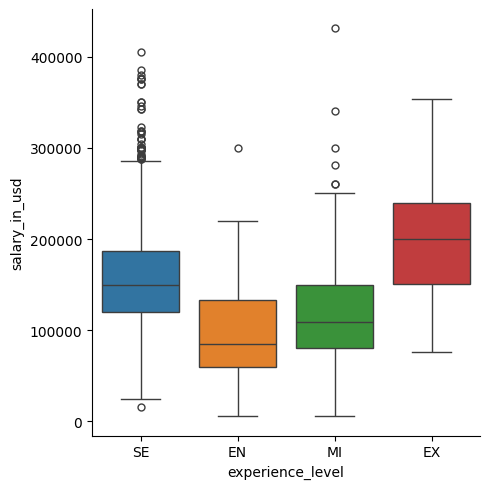

In [22]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10", kind='box')
plt.show()

### Cantidad de trabajos por nivel de experiencia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/3781652166.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'experience_level', kind = 'count', palette = "tab10")


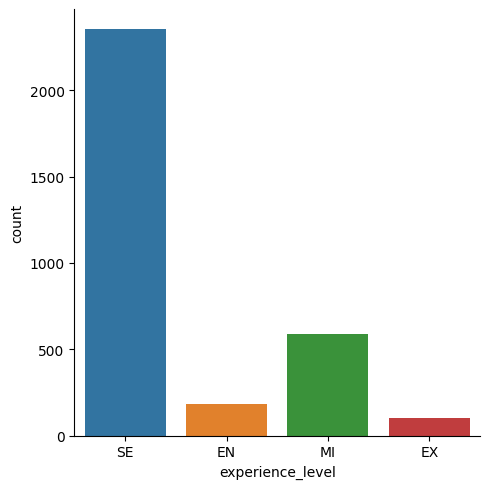

In [23]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', kind = 'count', palette = "tab10")
plt.show()

### Cantidad de trabajos por tamaño de la compañia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/4115360741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'company_size', kind = 'count', palette = "tab10")  #Esta columna se puede eliminar


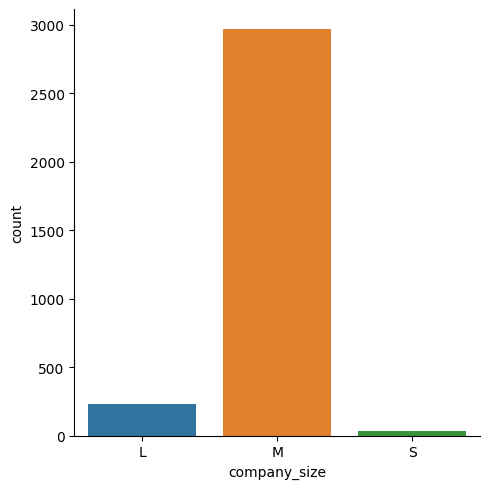

In [24]:
sb.catplot(data = df_proc_filtrado, x = 'company_size', kind = 'count', palette = "tab10")  #Esta columna se puede eliminar
plt.show()

### Salario dependiendo de la modalidad


In [25]:
df_proc_filtrado.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})
df_final.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})

/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/3215956267.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Remoto' 'Remoto' 'Remoto' ... 'Hibrido' 'Remoto' 'Presencial']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_proc_filtrado.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/3215956267.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Remoto' 'Remoto' 'Remoto' ... 'Hibrido' 'Remoto' 'Presencial']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})


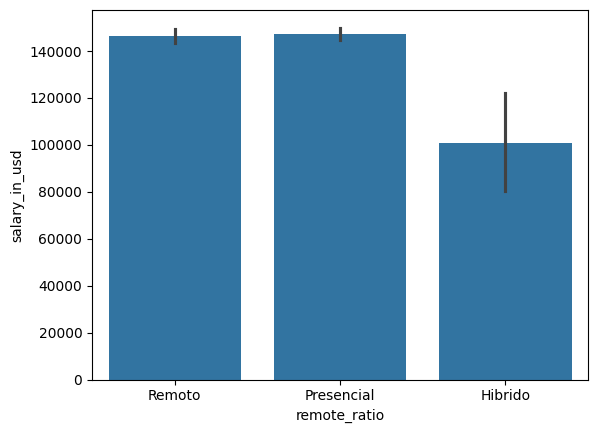

In [26]:
sb.barplot(y='salary_in_usd', x='remote_ratio', data=df_proc_filtrado)
plt.show()

### Transformación de datos


Se elimina la columna 'employment_type' ya que se esta filtrando por trabajos de tiempo completo, y se eliminan las columnas 'salary_currency' y 'salary' ya que se utiliza el valor del salario en dolares


In [27]:
df_proc_filtrado = df_proc_filtrado.drop(['employment_type','salary_currency','salary', 'work_year'], axis=1)
df_final = df_final.drop(['employment_type','salary_currency','salary', 'work_year'], axis=1)
df_proc_filtrado

,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,Principal Data Scientist,85847,ES,Remoto,ES,L
3,SE,Data Scientist,175000,CA,Remoto,CA,M
4,SE,Data Scientist,120000,CA,Remoto,CA,M
5,SE,Applied Scientist,222200,US,Presencial,US,L
6,SE,Applied Scientist,136000,US,Presencial,US,L
...,...,...,...,...,...,...,...
3472,MI,Data Scientist,48000,RU,Remoto,US,S
3482,SE,Research Scientist,144000,US,Hibrido,US,L
3486,EN,Financial Data Analyst,100000,US,Hibrido,US,L
3490,EN,Data Engineer,120000,US,Remoto,US,M


In [28]:
# Filtrar los datos por el percentil 90 para reducir sesgos por valores atípicos
percentil_90 = np.percentile(df_proc_filtrado['salary_in_usd'], 90)
df_proc_filtrado = df_proc_filtrado[df_proc_filtrado['salary_in_usd'] <= percentil_90]

percentil_90 = np.percentile(df_final['salary_in_usd'], 90)
df_final = df_final[df_final['salary_in_usd'] <= percentil_90]

### Codificación de Datos


In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
encoder = LabelEncoder()
df_proc_filtrado['job_title'] = encoder.fit_transform(df_proc_filtrado['job_title'])
df_final['job_title'] = encoder.fit_transform(df_final['job_title'])
job_title_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_13003/2805681563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc_filtrado['job_title'] = encoder.fit_transform(df_proc_filtrado['job_title'])


In [31]:
encoder = OneHotEncoder(sparse_output=False)  
encoded_array = encoder.fit_transform(df_proc_filtrado[['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']))
encoded_df.index = df_proc_filtrado.index
df_proc_filtrado = pd.concat([df_proc_filtrado, encoded_df], axis=1)
df_proc_filtrado.drop(['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio'], axis=1, inplace=True)

In [32]:
df_proc_filtrado

,job_title,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employee_residence_AR,employee_residence_BO,employee_residence_BR,employee_residence_CA,...,company_location_ES,company_location_GB,company_location_IN,company_location_US,company_size_L,company_size_M,company_size_S,remote_ratio_Hibrido,remote_ratio_Presencial,remote_ratio_Remoto
0,68,85847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,36,175000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36,120000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,6,222200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,6,136000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,36,48000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3482,72,144000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3486,44,100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3490,24,120000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Modelos


In [33]:
X = df_proc_filtrado.drop('salary_in_usd', axis=1)
y = df_proc_filtrado['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión Lineal


In [34]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
y_predt = linear_regression.predict(X_train)
print('Linear Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Linear Regression R2 Score:', r2_score(y_test, y_pred))

Linear Regression MAE: 30208.342361306564
Linear Regression RMSE: 36916.64245791995
Linear Regression R2 Score: 0.3426604164947996


### KNN


In [35]:
param_grid = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)
print('KNN MAE:', mean_absolute_error(y_test, knn_model.predict(X_test)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))
print('KNN R2 Score:', r2_score(y_test, knn_model.predict(X_test)))

Best Parameters: {'metric': 'cosine', 'n_neighbors': 20, 'weights': 'distance'}
Best Score: 0.305670813298262
KNN MAE: 29490.1279614788
KNN RMSE: 37048.51002926406
KNN R2 Score: 0.3379559480573865


### Árbol de Decisión


In [36]:
param_grid = {
    'max_depth': [None, 5, 15, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

tree_model = grid_search.best_estimator_
tree_model.fit(X_train, y_train)
print('Decision Tree MAE:', mean_absolute_error(y_test, tree_model.predict(X_test)))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test))))
print('Decision Tree R2 Score:', r2_score(y_test, tree_model.predict(X_test)))

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Score: 0.3386036507698802
Decision Tree MAE: 28718.77122012291
Decision Tree RMSE: 36064.57202090961
Decision Tree R2 Score: 0.3726542501271969


### Random Forest


In [ ]:
param_grid = {
    'n_estimators': [100, 300, 600],
    'max_depth': [None, 15, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_random_forest.fit(X_train, y_train)
print('Best Parameters:', grid_search_random_forest.best_params_)
print('Best Score:', grid_search_random_forest.best_score_)

random_forest_model = grid_search_random_forest.best_estimator_
random_forest_model.fit(X_train, y_train)
print('Random Forest MAE:', mean_absolute_error(y_test, random_forest_model.predict(X_test)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, random_forest_model.predict(X_test))))
print('Random Forest R2 Score:', r2_score(y_test, random_forest_model.predict(X_test)))

### Ada Boost


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2]

}

grid_search = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

ada_boost_model = grid_search.best_estimator_
ada_boost_model.fit(X_train, y_train)
print('Ada Boost MAE:', mean_absolute_error(y_test, ada_boost_model.predict(X_test)))
print('Ada Boost RMSE:', np.sqrt(mean_squared_error(y_test, ada_boost_model.predict(X_test))))
print('Ada Boost R2 Score:', r2_score(y_test, ada_boost_model.predict(X_test)))

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.21264670509734188
Ada Boost MAE: 36973.78310682261
Ada Boost RMSE: 47779.776242127824
Ada Boost R2 Score: 0.25894705378961935


### Gradient Boosting


In [ ]:
param_grid = {
    'n_estimators': [100, 300, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

gradient_boosting_model = grid_search.best_estimator_
gradient_boosting_model.fit(X_train, y_train)
print('Gradient Boosting MAE:', mean_absolute_error(y_test, gradient_boosting_model.predict(X_test)))
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(y_test, gradient_boosting_model.predict(X_test))))
print('Gradient Boosting R2 Score:', r2_score(y_test, gradient_boosting_model.predict(X_test)))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.31999254005047134
Gradient Boosting MAE: 34869.139725157285
Gradient Boosting RMSE: 44915.85055395171
Gradient Boosting R2 Score: 0.34512219534013355


In [ ]:
df_final.to_csv('salaries_final.csv', index=False)